## **Лабораторная работа №5**

**Бизнес-цели:**

Улучшение финансового планирования

Использование подходов кластеризации для предсказания объемов продаж и доходов по различным сегментам

**Столбцы датасета и их пояснение:**

**Date** - Дата, на которую относятся данные. Эта характеристика указывает конкретный день, в который происходила торговля акциями Walmart.

**Open** - Цена открытия. Стоимость акций Walmart в начале торгового дня. Это важный показатель, который показывает, по какой цене начались торги в конкретный день, и часто используется для сравнения с ценой закрытия для определения дневного тренда.

**High** - Максимальная цена за день. Наибольшая цена, достигнутая акциями Walmart в течение торгового дня. Эта характеристика указывает, какой была самая высокая стоимость акций за день.

**Low** - Минимальная цена за день. Наименьшая цена, по которой торговались акции Walmart в течение дня.

**Close** - Цена закрытия. Стоимость акций Walmart в конце торгового дня. Цена закрытия — один из основных показателей, используемых для анализа акций, так как она отображает итоговую стоимость акций за день и часто используется для расчета дневных изменений и трендов на длительных временных периодах.

**Adj Close** - Скорректированная цена закрытия. Цена закрытия, скорректированная с учетом всех корпоративных действий.

**Volume** - Объем торгов. Количество акций Walmart, проданных и купленных в течение дня. 

**Выгружаем данные**

In [12]:
import pandas as pd

df = pd.read_csv("data/wmt_data.csv").head(15000)

print(df.head())
print(df.columns)
display(df.head(15))
print(df.isnull().sum())  

         Date      Open      High       Low     Close  Adj Close   Volume
0  1972-08-25  0.021159  0.021566  0.021159  0.021484   0.011664  7526400
1  1972-08-28  0.021484  0.021647  0.021403  0.021403   0.011620  2918400
2  1972-08-29  0.021322  0.021322  0.021159  0.021159   0.011488  5836800
3  1972-08-30  0.021159  0.021159  0.020996  0.021159   0.011488  1228800
4  1972-08-31  0.020996  0.020996  0.020833  0.020833   0.011311  2611200
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Date      Open      High       Low     Close  Adj Close   Volume
0   1972-08-25  0.021159  0.021566  0.021159  0.021484   0.011664  7526400
1   1972-08-28  0.021484  0.021647  0.021403  0.021403   0.011620  2918400
2   1972-08-29  0.021322  0.021322  0.021159  0.021159   0.011488  5836800
3   1972-08-30  0.021159  0.021159  0.020996  0.021159   0.011488  1228800
4   1972-08-31  0.020996  0.020996  0.020833  0.020833   0.011311  2611200
5   1972-09-01  0.020915  0.020996  0.020915  0.020996   0.011400   768000
6   1972-09-05  0.020996  0.020996  0.020833  0.020833   0.011311  1689600
7   1972-09-06  0.020996  0.020996  0.020996  0.020996   0.011400   768000
8   1972-09-07  0.020996  0.020996  0.020915  0.020915   0.011356  3532800
9   1972-09-08  0.020833  0.020833  0.020752  0.020752   0.011267  1996800
10  1972-09-11  0.020915  0.020915  0.020915  0.020915   0.011356  2764800
11  1972-09-12  0.020915  0.020915  0.020915  0.020915   0.011356  1843200
12  1972-09-13  0.020915  0.020915  0.020915  0.020915   0.011356   460800
13  1972-09-14  0.020915  0.021077  0.020833  0.021077   0.011443  3840000
14  1972-09-15  0.020996  0.020996  0.020915  0.020915   0.011356  1536000

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**Очистка данных**

In [13]:
df_cleaned = df.drop(columns=['Date'], errors='ignore').dropna()
print(df_cleaned.head())  # Вывод очищенного DataFrame


       Open      High       Low     Close  Adj Close   Volume
0  0.021159  0.021566  0.021159  0.021484   0.011664  7526400
1  0.021484  0.021647  0.021403  0.021403   0.011620  2918400
2  0.021322  0.021322  0.021159  0.021159   0.011488  5836800
3  0.021159  0.021159  0.020996  0.021159   0.011488  1228800
4  0.020996  0.020996  0.020833  0.020833   0.011311  2611200


**Визуализация парных взаимосвязей**

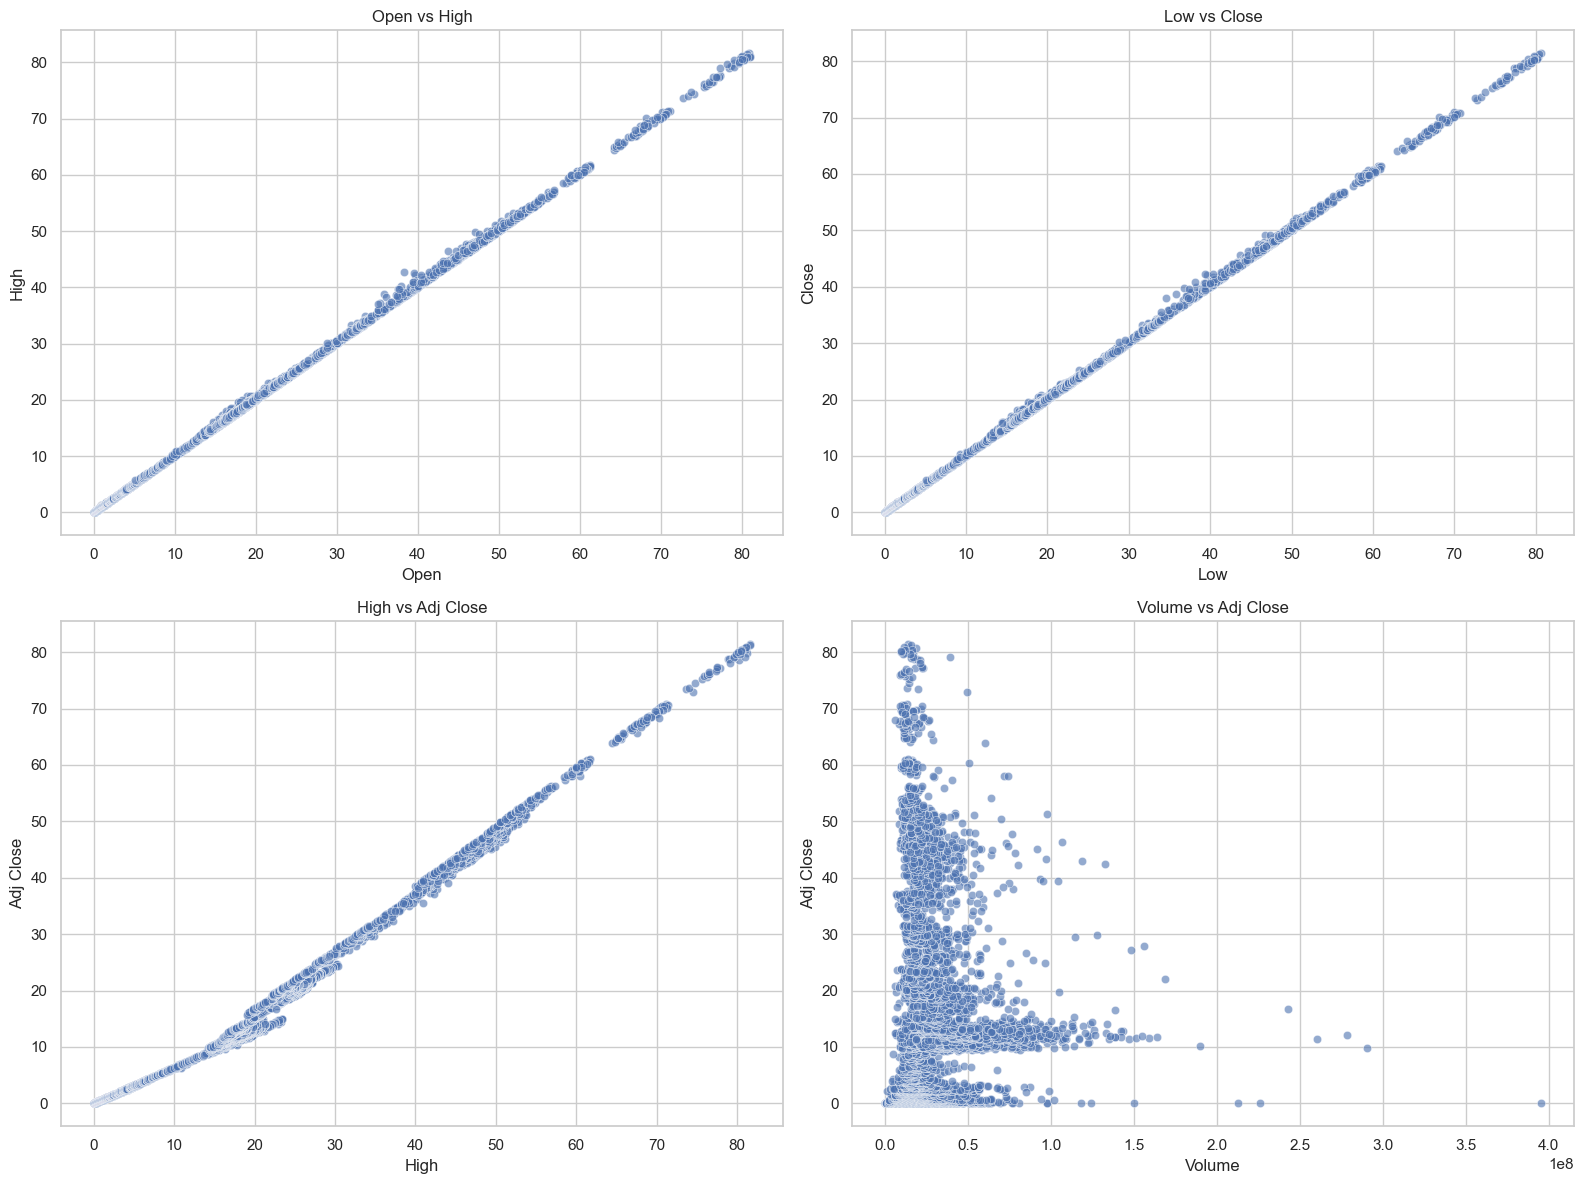

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned["Open"], y=df_cleaned["High"], alpha=0.6)
plt.title('Open vs High')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], alpha=0.6)
plt.title('Low vs Close')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], alpha=0.6)
plt.title('High vs Adj Close')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], alpha=0.6)
plt.title('Volume vs Adj Close')

plt.tight_layout()
plt.show()

Корелляция сильная на первых трёх графиках, а по последнему можно сделать вывод, что корелляция слабая и прямой зависимости нет.


**Стандартизация данных для кластеризации**



In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)


**Агломеративная (иерархическая) кластеризация**


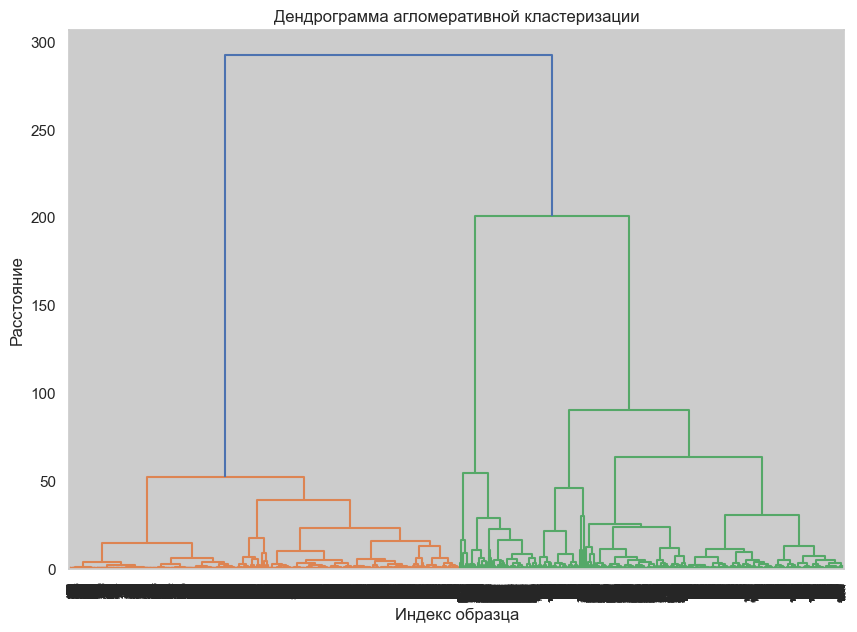

[2 1 2 ... 9 9 9]


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()

# Получение результатов кластеризации с заданным порогом
result = fcluster(linkage_matrix, t=10, criterion='distance')
print(result)  # Вывод результатов кластеризации


**Визуализация распределения кластеров**


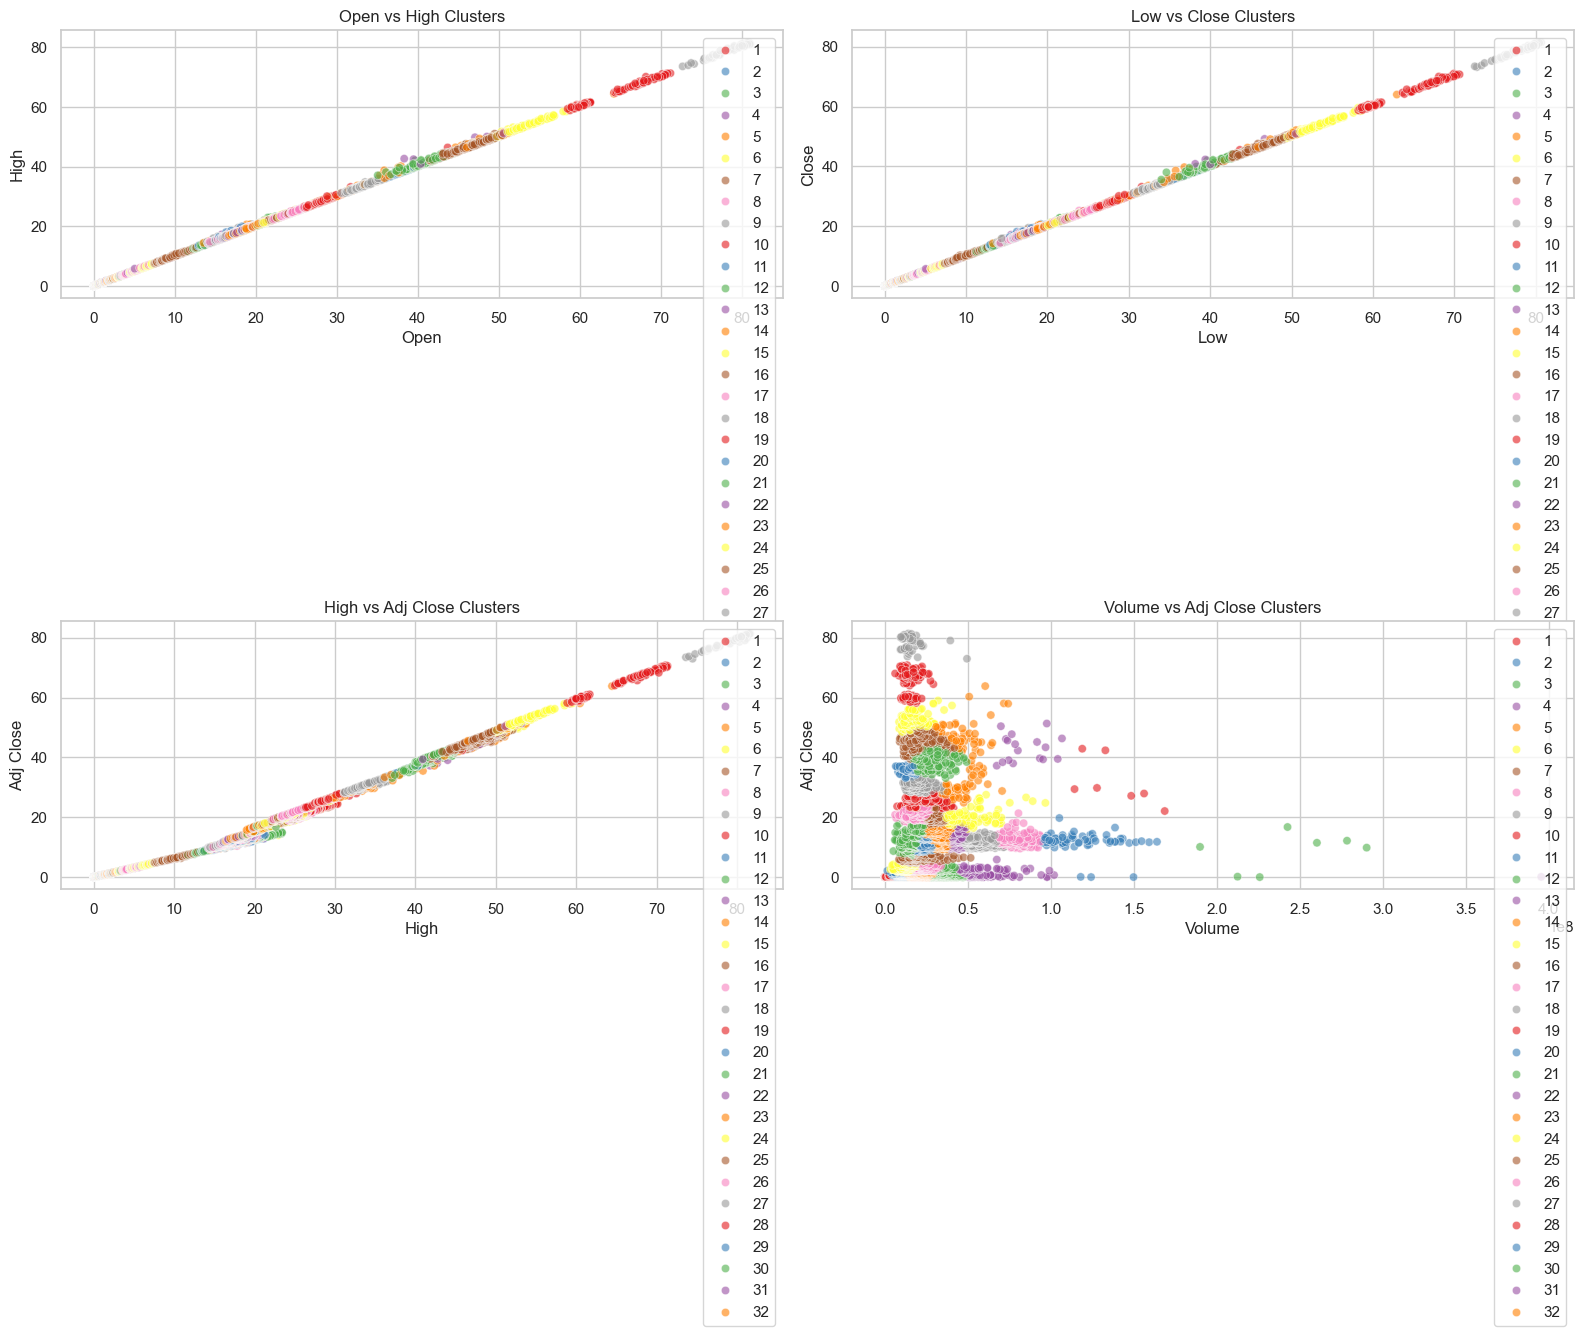

In [17]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], hue=result, palette='Set1', alpha=0.6)
plt.title('Open vs High Clusters')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('Low vs Close Clusters')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('High vs Adj Close Clusters')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('Volume vs Adj Close Clusters')

plt.tight_layout()
plt.show()



**KMeans (неиерархическая кластеризация) для сравнения**


Центры кластеров:
 [[1.80172461e+00 1.82298328e+00 1.77878707e+00 1.80190896e+00
  1.12235004e+00 1.40331174e+07]
 [2.01023414e+01 2.02889878e+01 1.99175185e+01 2.01054904e+01
  1.51394877e+01 3.34414658e+07]
 [4.81867001e+01 4.85778072e+01 4.78128132e+01 4.82043999e+01
  4.64423199e+01 2.18625744e+07]]


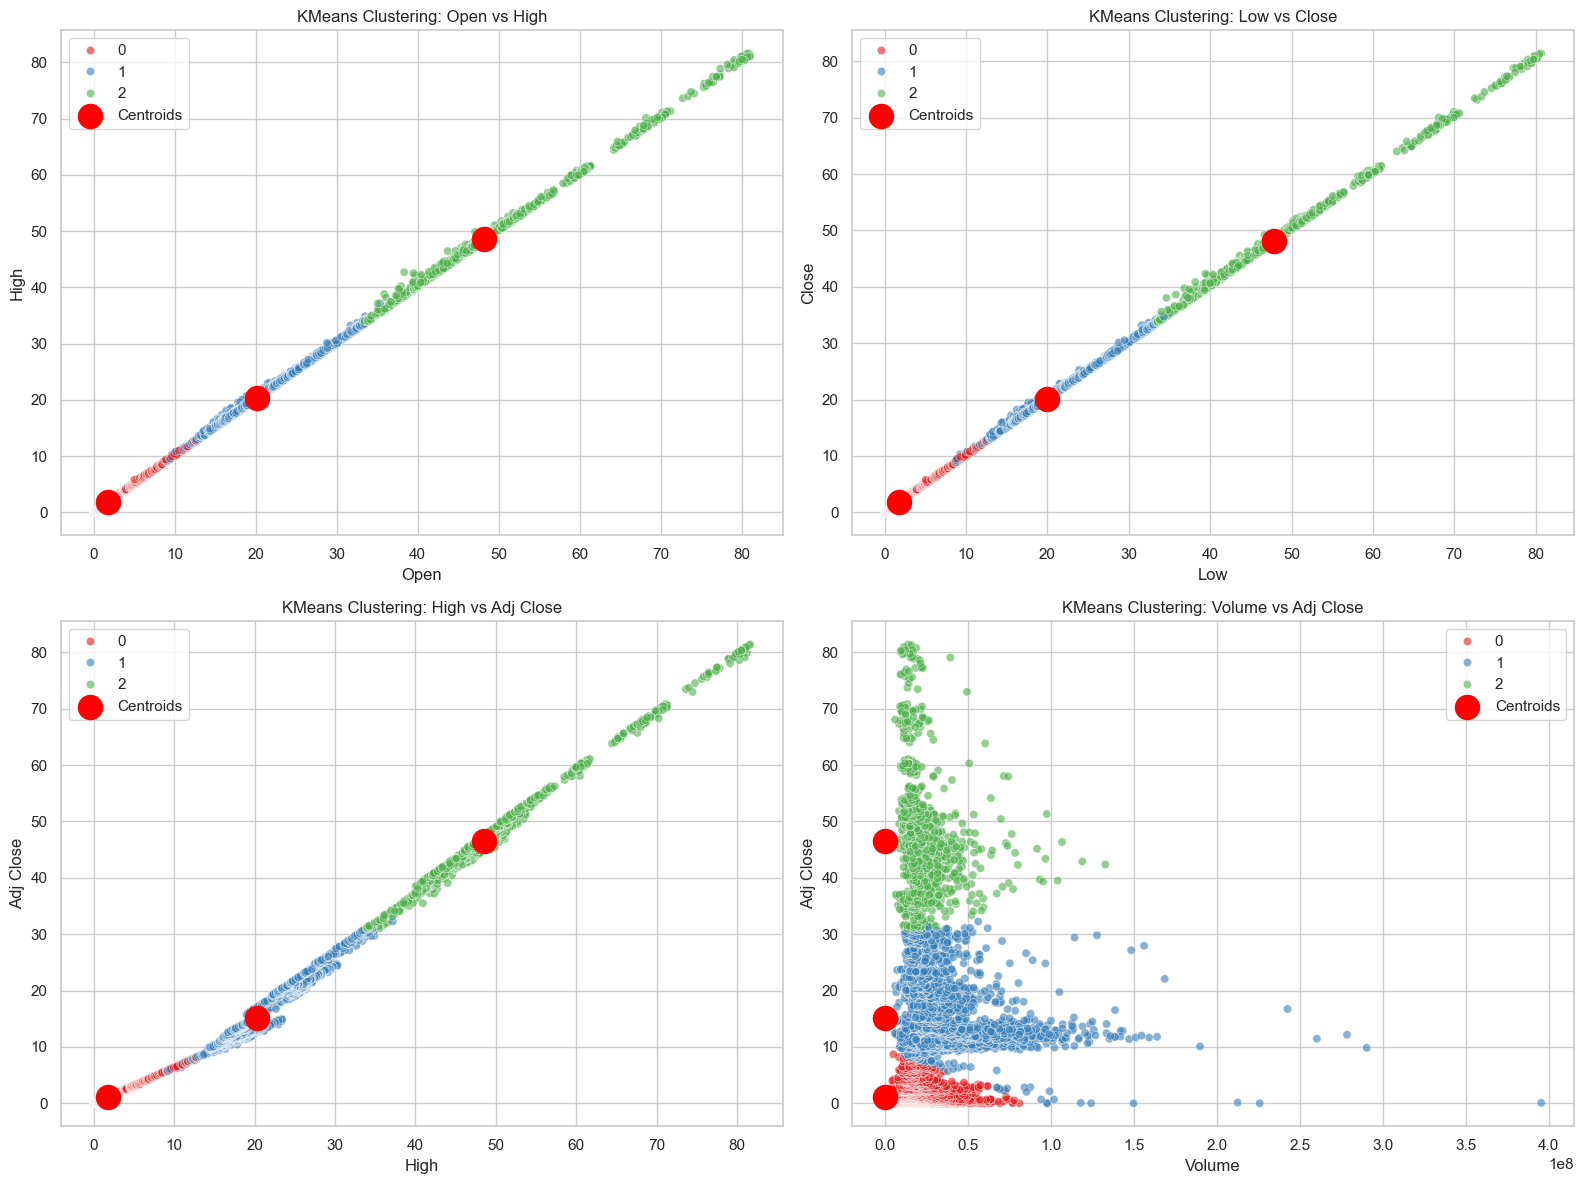

In [18]:
from sklearn.cluster import KMeans

random_state = 9
kmeans = KMeans(n_clusters=3, random_state=random_state)
labels = kmeans.fit_predict(data_scaled)
centers = kmeans.cluster_centers_

# Отображение центроидов
centers = scaler.inverse_transform(centers)  # Обратная стандартизация
print("Центры кластеров:\n", centers)

# Визуализация результатов кластеризации KMeans
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Open vs High')
plt.legend()

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 2], centers[:, 3], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Low vs Close')
plt.legend()

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 1], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: High vs Adj Close')
plt.legend()

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 3], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Volume vs Adj Close')
plt.legend()

plt.tight_layout()
plt.show()


**PCA для визуализации сокращенной размерности**


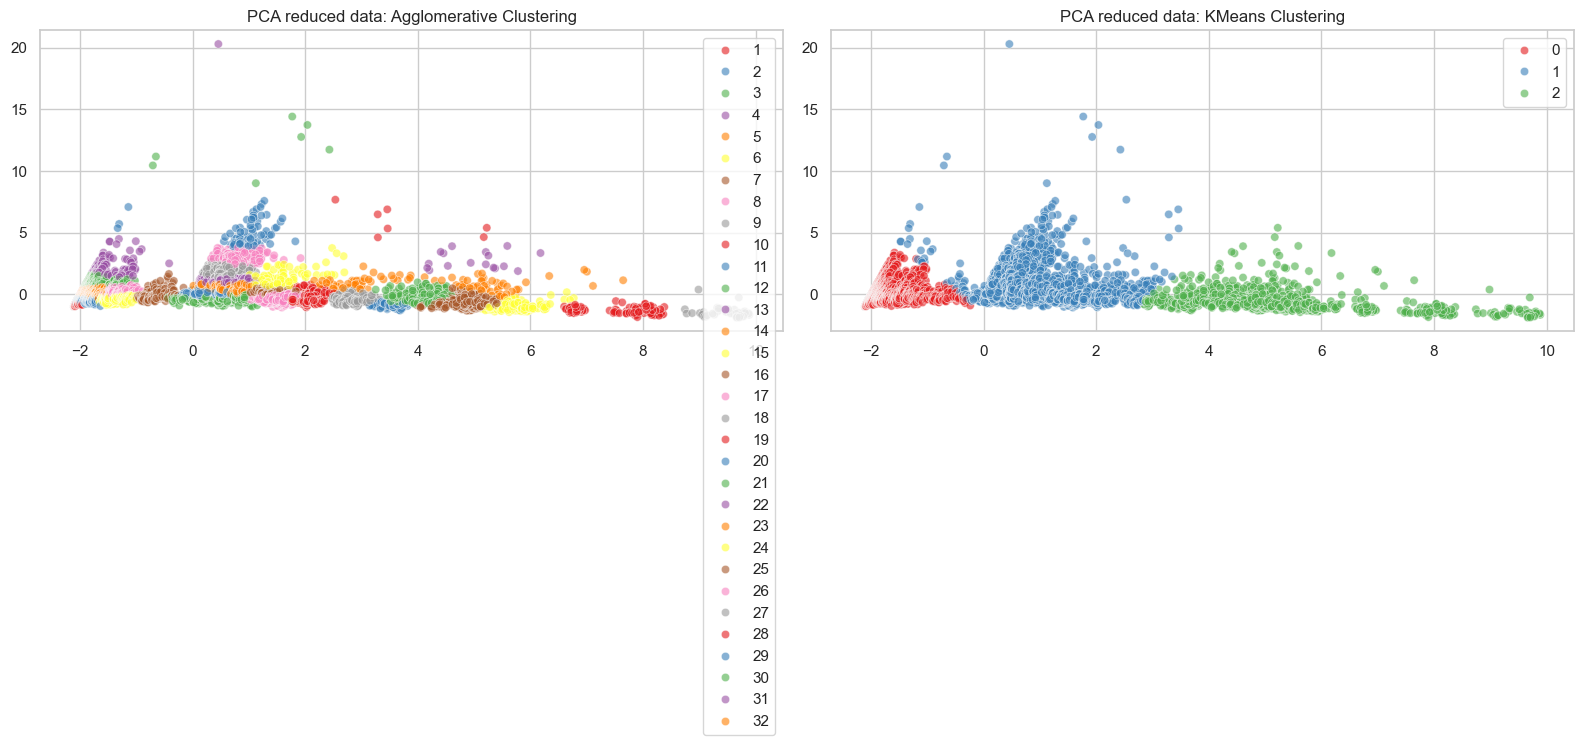

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Визуализация сокращенных данных
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=result, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: Agglomerative Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: KMeans Clustering')

plt.tight_layout()
plt.show()


**Анализ инерции для метода локтя (метод оценки суммы квадратов расстояний)**


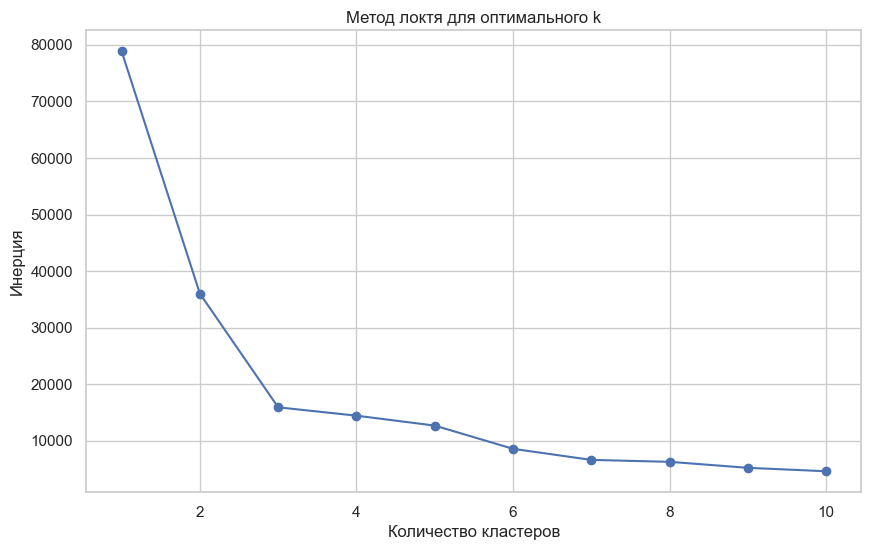

In [20]:
inertias = []
clusters_range = range(1, 11)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()


**Расчет коэффициентов силуэта**


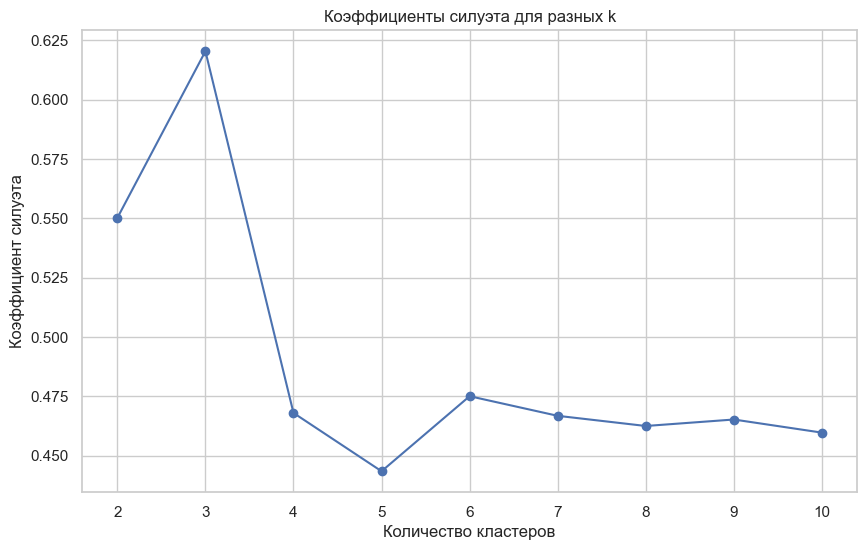

In [21]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Построение диаграммы значений силуэта
plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.title('Коэффициенты силуэта для разных k')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()

Средний коэффициент силуэта: 0.620


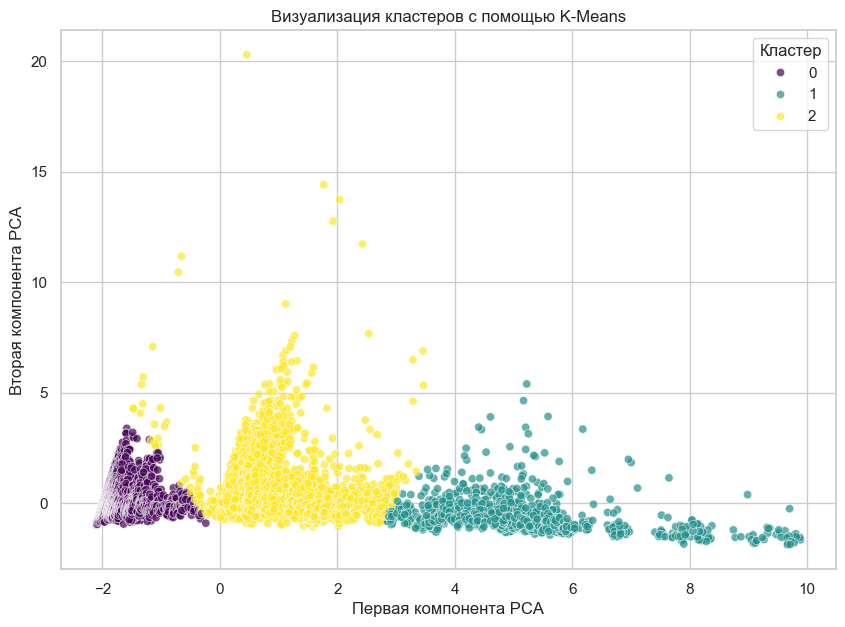

In [22]:
from sklearn.decomposition import PCA

# Применение K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  
df_clusters = kmeans.fit_predict(data_scaled)

# Оценка качества кластеризации
silhouette_avg = silhouette_score(data_scaled, df_clusters)
print(f'Средний коэффициент силуэта: {silhouette_avg:.3f}')

# Визуализация кластеров
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_clusters, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью K-Means')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.legend(title='Кластер', loc='upper right')
plt.show()

Средний коэффициент силуэта, равный 0.620, указывает на умеренно хорошую кластеризацию.